In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("day.csv")
print(df.shape)
#Drop Columns which have more than 90% NULL values and save the CSV file with new Name
print(len(df))
limitPer = len(df) * .10
print(limitPer)
df1 = df.dropna(thresh=limitPer, axis=1)
print(df1.shape)
df1.to_csv('day2.csv', index=False)

#Drop Columns which have same value in each row and save to CSV file with new Name
print(df1.columns[df1.nunique() <= 1])
df2=df1.drop(columns=df1.columns[df1.nunique() <= 1], axis=1)
print(df2.shape)
df2.to_csv('day3.csv', index=False)

print(df2.columns)



(730, 16)
730
73.0
(730, 16)
Index([], dtype='object')
(730, 16)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [2]:
#Remove unwanted columns
df3 = pd.read_csv("day3.csv")
df3=df3.drop(columns=['instant', 'dteday','casual', 'registered'],axis=1)
print(df3.columns)
df3.to_csv('day4.csv', index=False)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


In [3]:
#Check the Number of Null Values in data
df4 = pd.read_csv("day4.csv")
print(df4.info())
print(df4.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB
None
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


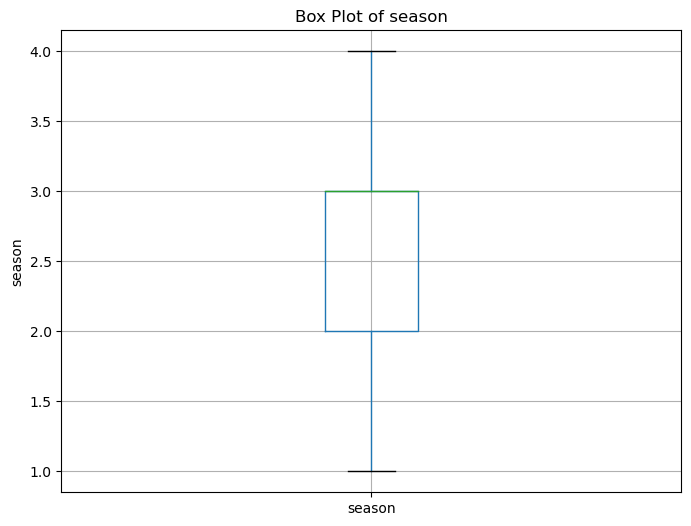

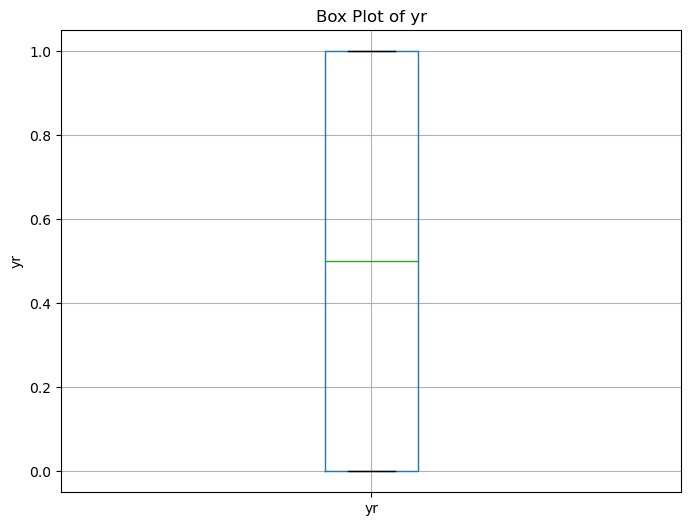

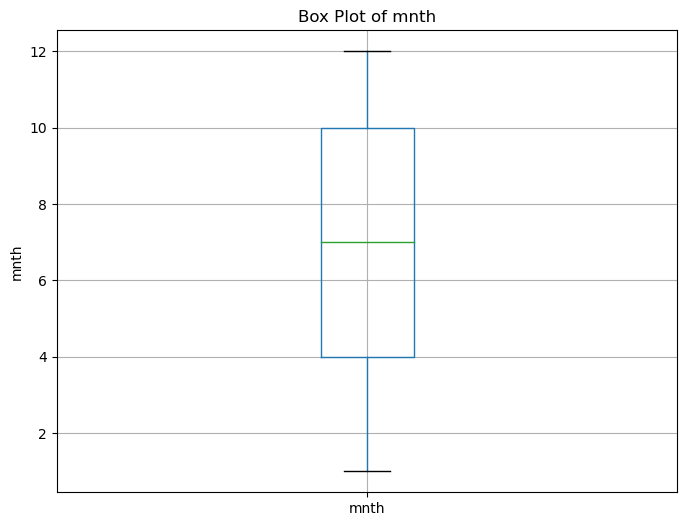

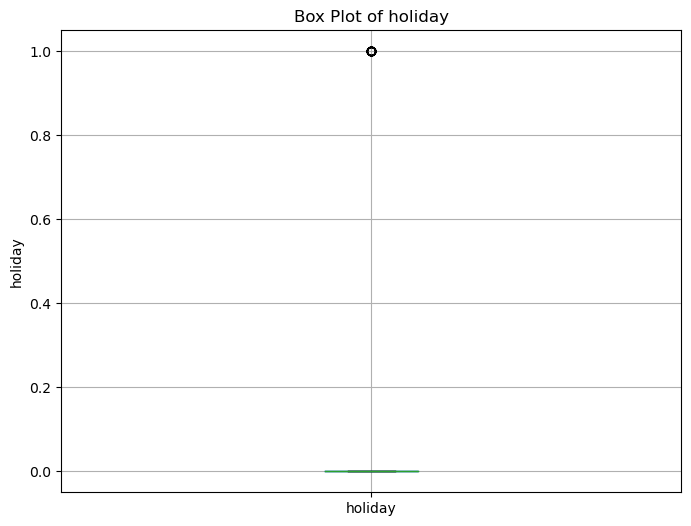

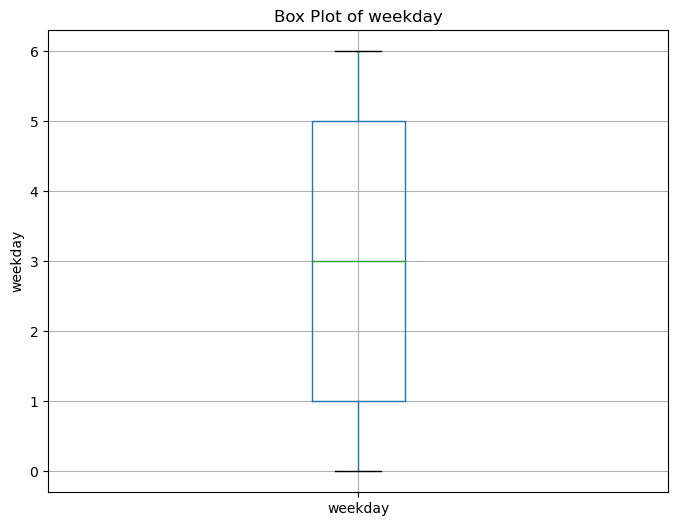

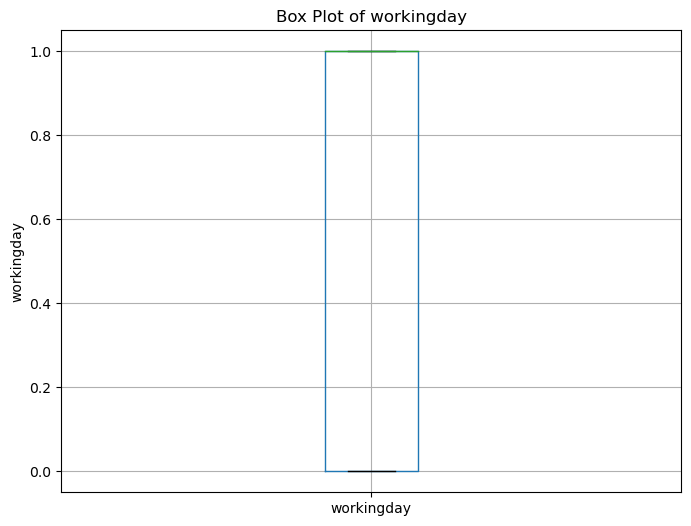

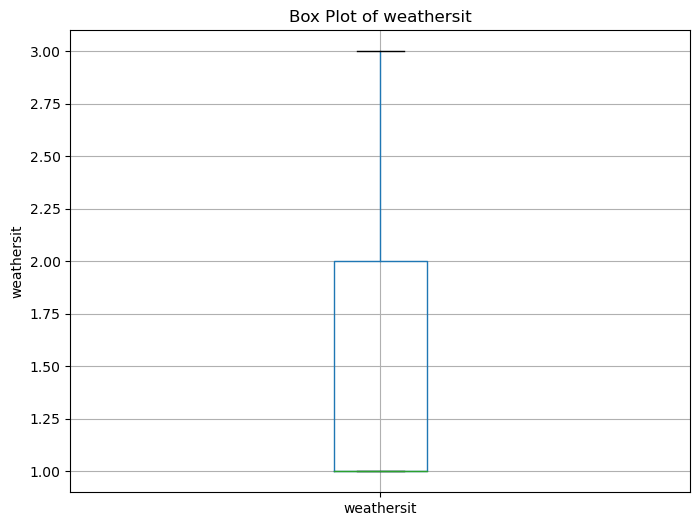

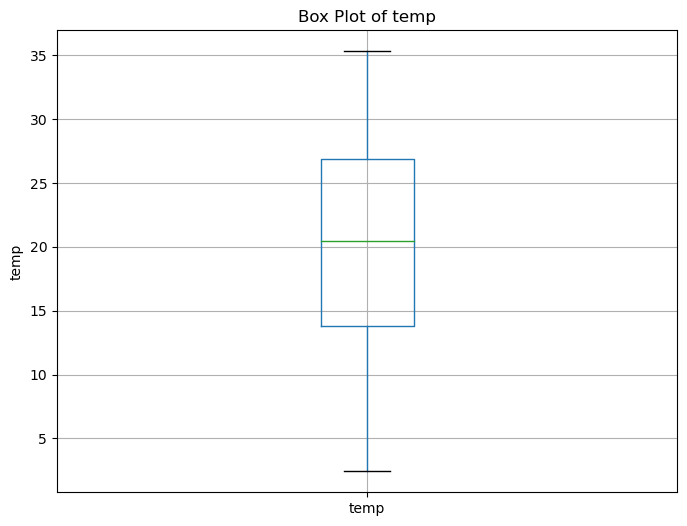

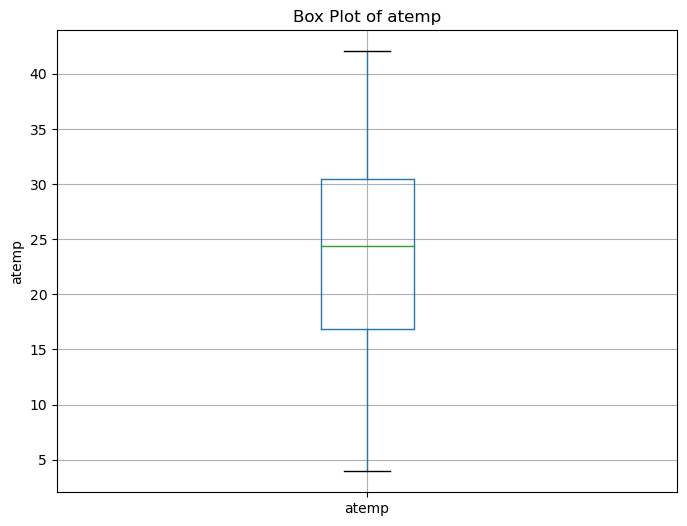

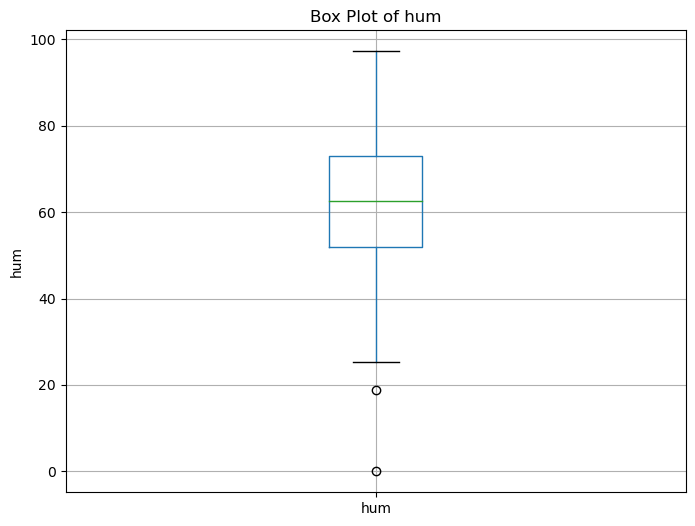

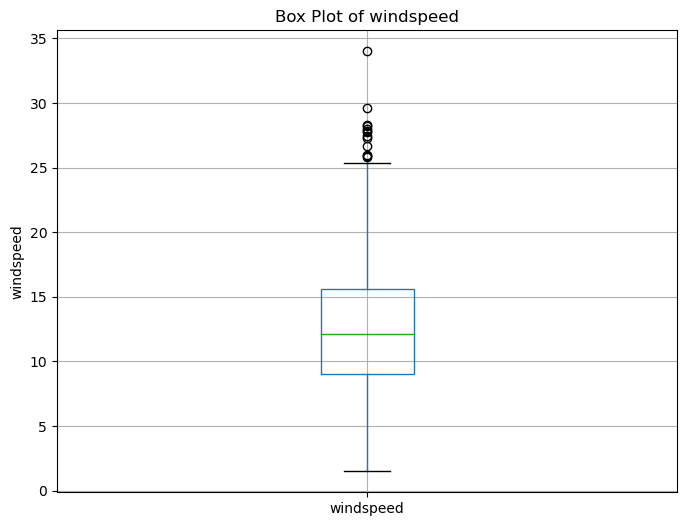

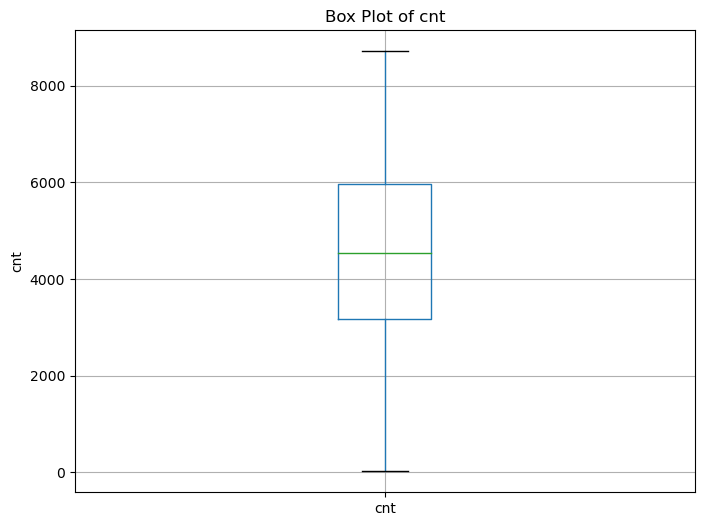

In [4]:
#All the above values are numeric and there is No Null 

# Find outliers using box plot if there are any for all the numeric columns


numeric_columns = df4.select_dtypes(include='number')
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    df2.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show() 

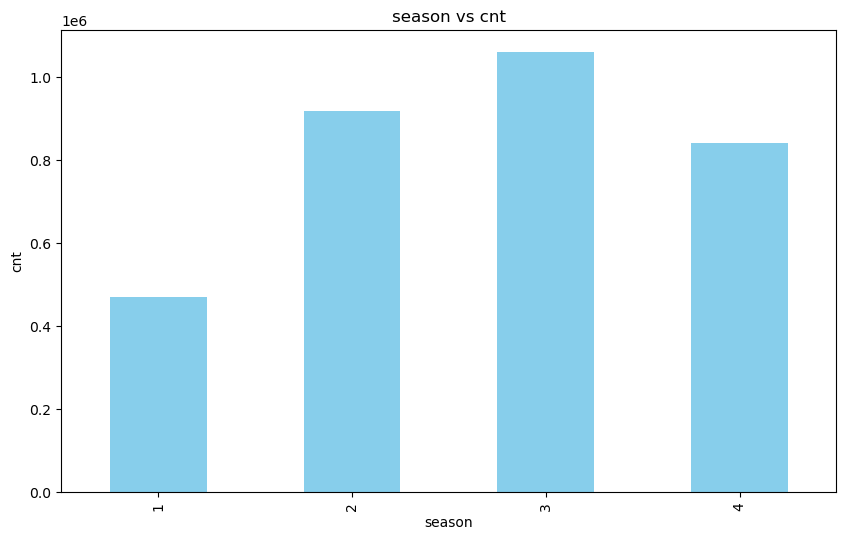

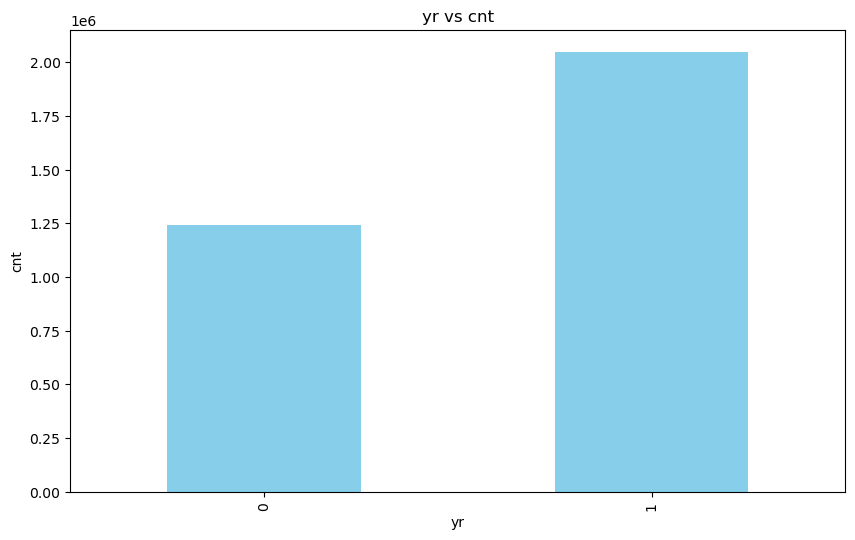

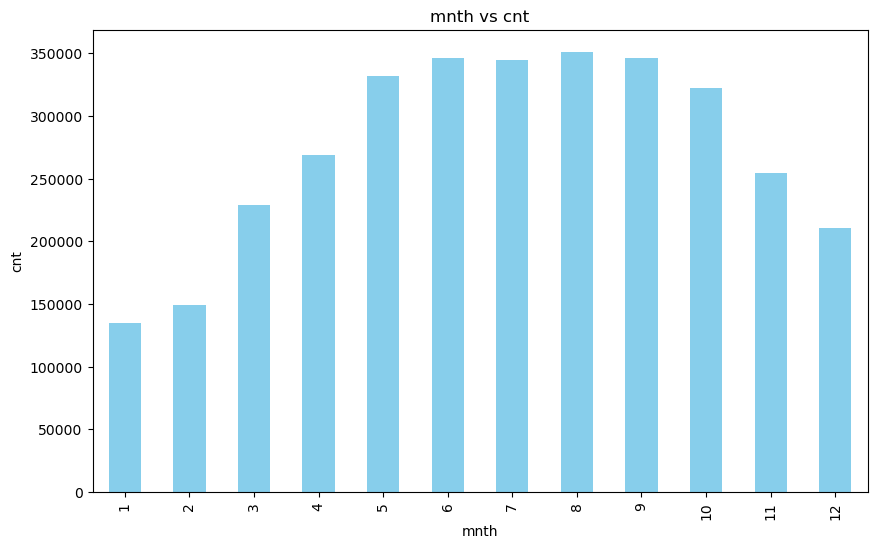

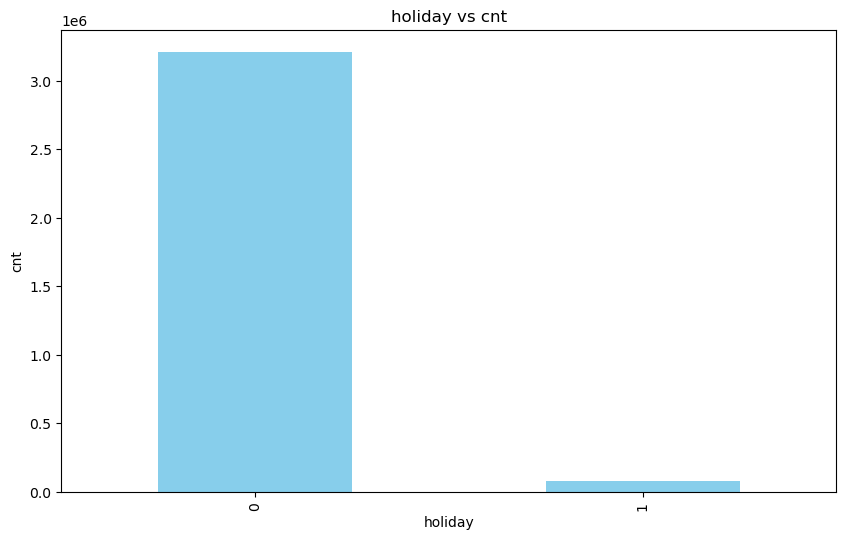

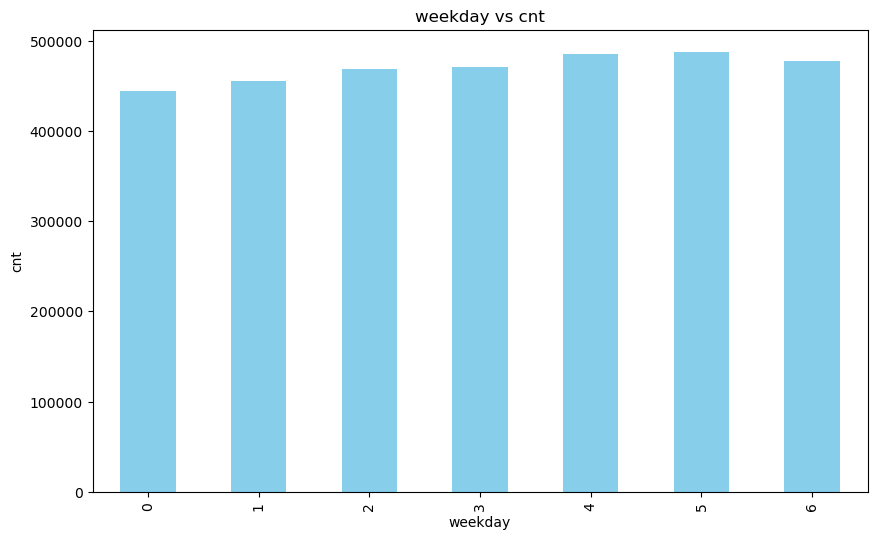

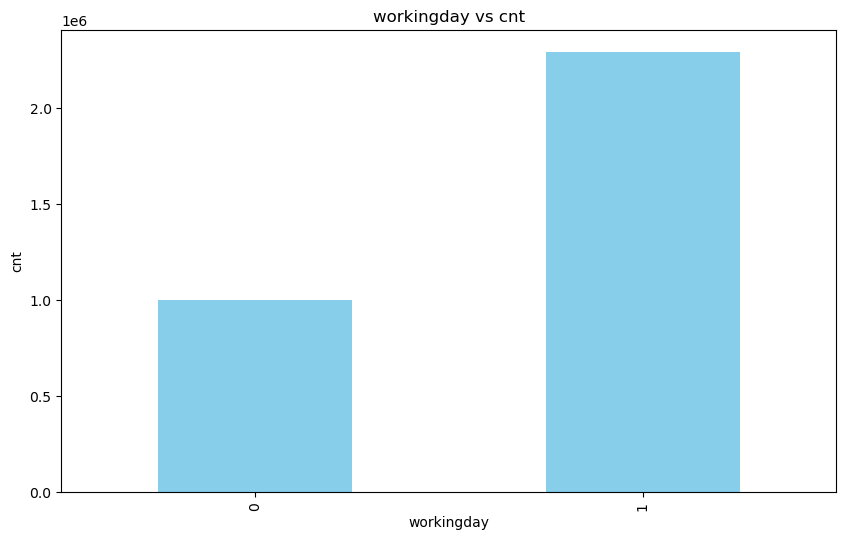

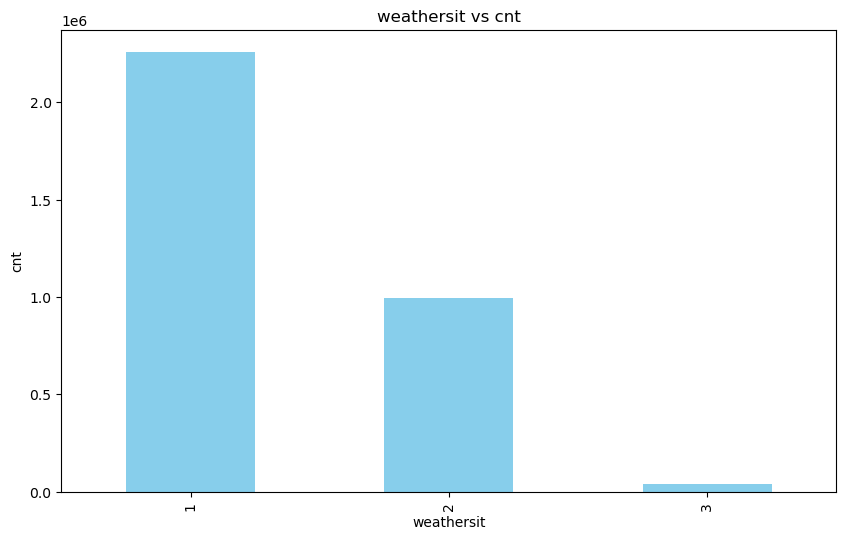

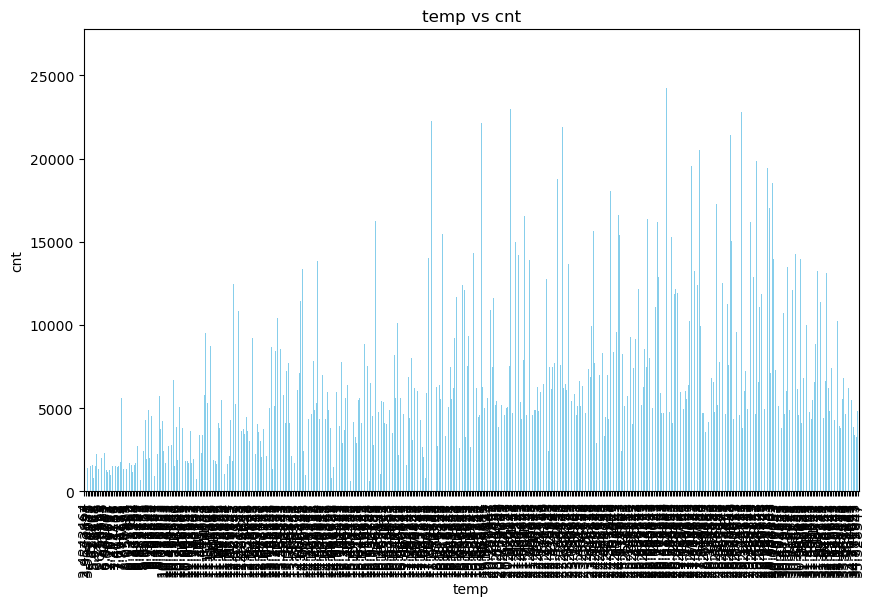

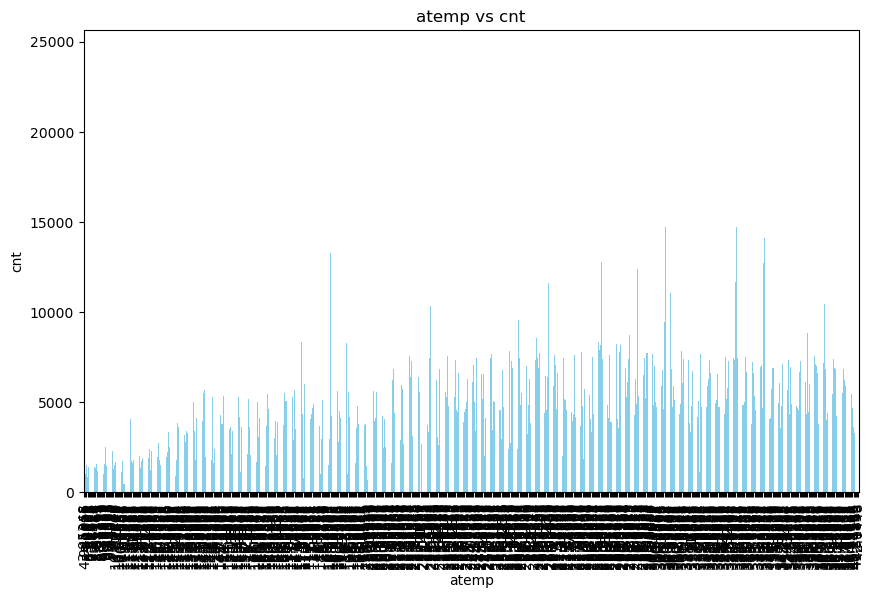

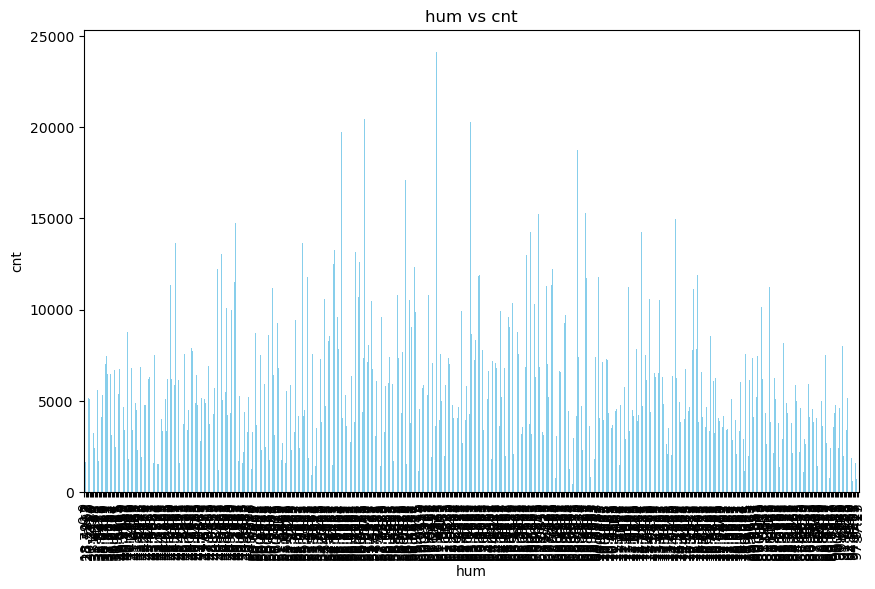

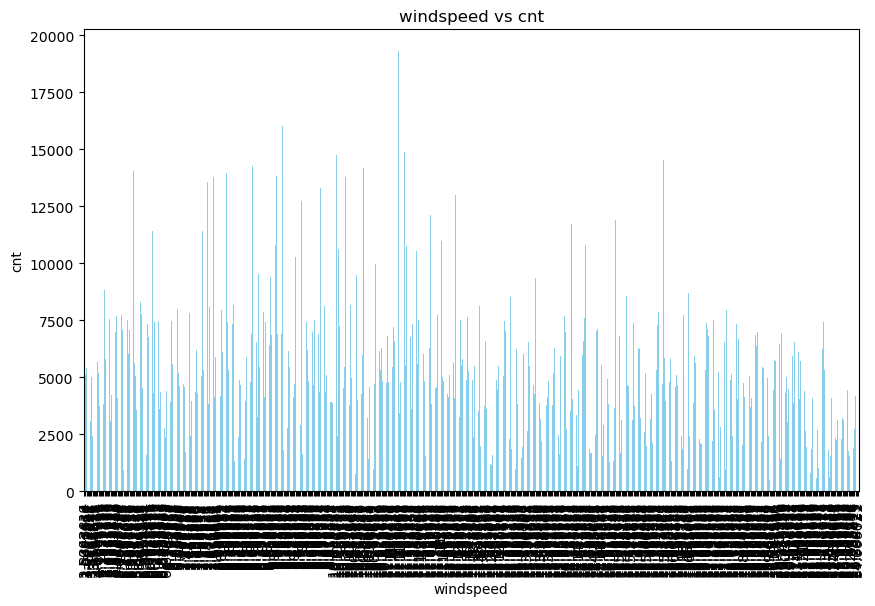

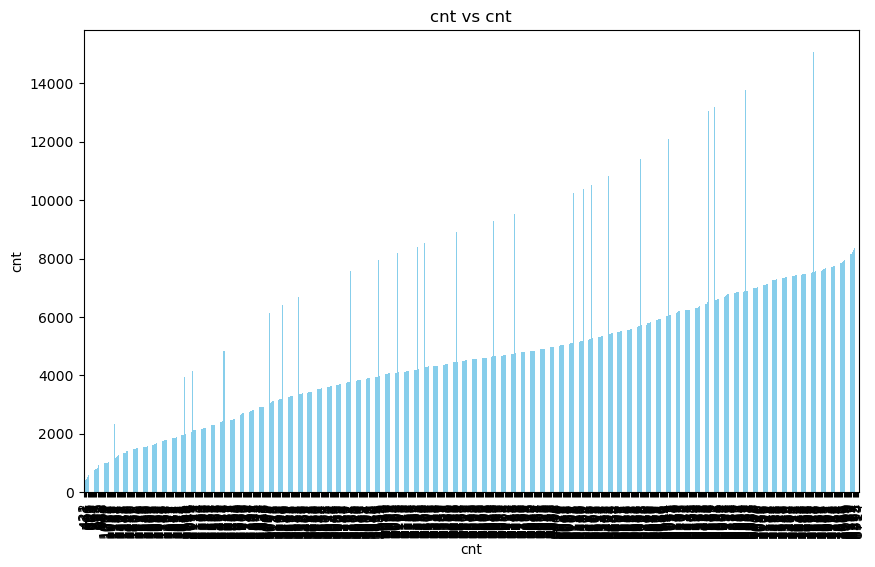

In [5]:
# There are no outliers as observed in the above box plots
# Draw barchart plots of all independent variables against dependent variable which is cnt 

# Dependent variable
dependent_var = 'cnt'
numeric_columns = df4.select_dtypes(include='number')
# Loop through each independent variable and create a bar chart
for var in numeric_columns:
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    df4.groupby(var)[dependent_var].sum().plot(kind='bar', color='skyblue')
    plt.title(f'{var} vs {dependent_var}')
    plt.xlabel(var)
    plt.ylabel(dependent_var)
    plt.show()

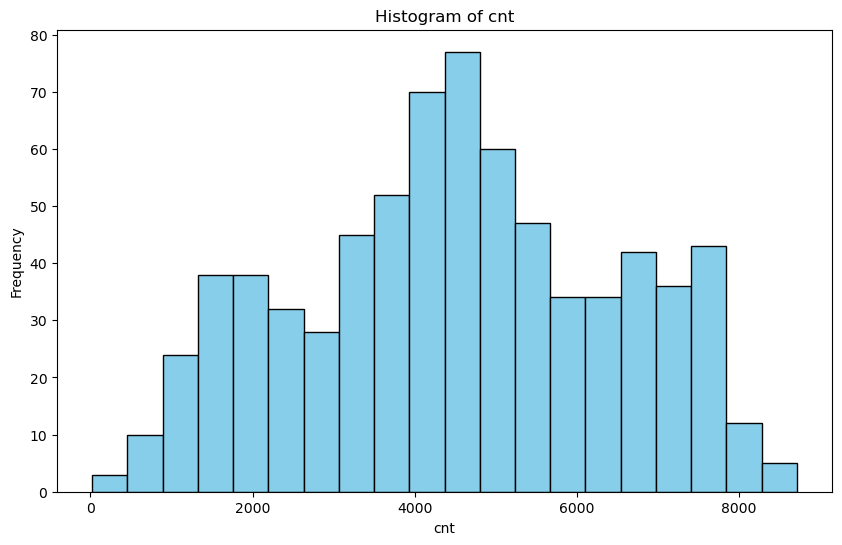

In [6]:
# Create a histogram for the 'cnt' variable
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.hist(df4[dependent_var], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title(f'Histogram of {dependent_var}')
plt.xlabel(dependent_var)
plt.ylabel('Frequency')
plt.show()

In [7]:
# Create Dummy Variables first 
month = pd.get_dummies(df4['mnth'], drop_first = True)
month = month.add_prefix('Month_')
# Concatenating dummy variables to the original DataFrame
df4 = pd.concat([df4, month], axis=1)

Seasons = pd.get_dummies(df4['season'], drop_first = True)
Seasons = Seasons.add_prefix('Season_')
# Concatenating dummy variables to the original DataFrame
df4 = pd.concat([df4, Seasons], axis=1)


Weekdays = pd.get_dummies(df4['weekday'], drop_first = True)
Weekdays = Weekdays.add_prefix('Weekday_')
# Concatenating dummy variables to the original DataFrame
df4 = pd.concat([df4, Weekdays], axis=1)


Weathers = pd.get_dummies(df4['weathersit'], drop_first = True)
Weathers = Weathers.add_prefix('Weather_')
# Concatenating dummy variables to the original DataFrame
df4 = pd.concat([df4, Weathers], axis=1)
print(df4.columns)
# Drop Columns 
df5=df4.drop(columns=['season', 'mnth','weekday', 'weathersit'],axis=1)
print(df5.columns)
df5.to_csv('day5.csv', index=False)
df5.head()

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Season_2', 'Season_3',
       'Season_4', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6', 'Weather_2', 'Weather_3'],
      dtype='object')
Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Season_2',
       'Season_3', 'Season_4', 'Weekday_1', 'Weekday_2', 'Weekday_3',
       'Weekday_4', 'Weekday_5', 'Weekday_6', 'Weather_2', 'Weather_3'],
      dtype='object')


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Month_2,Month_3,...,Season_3,Season_4,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Weather_2,Weather_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


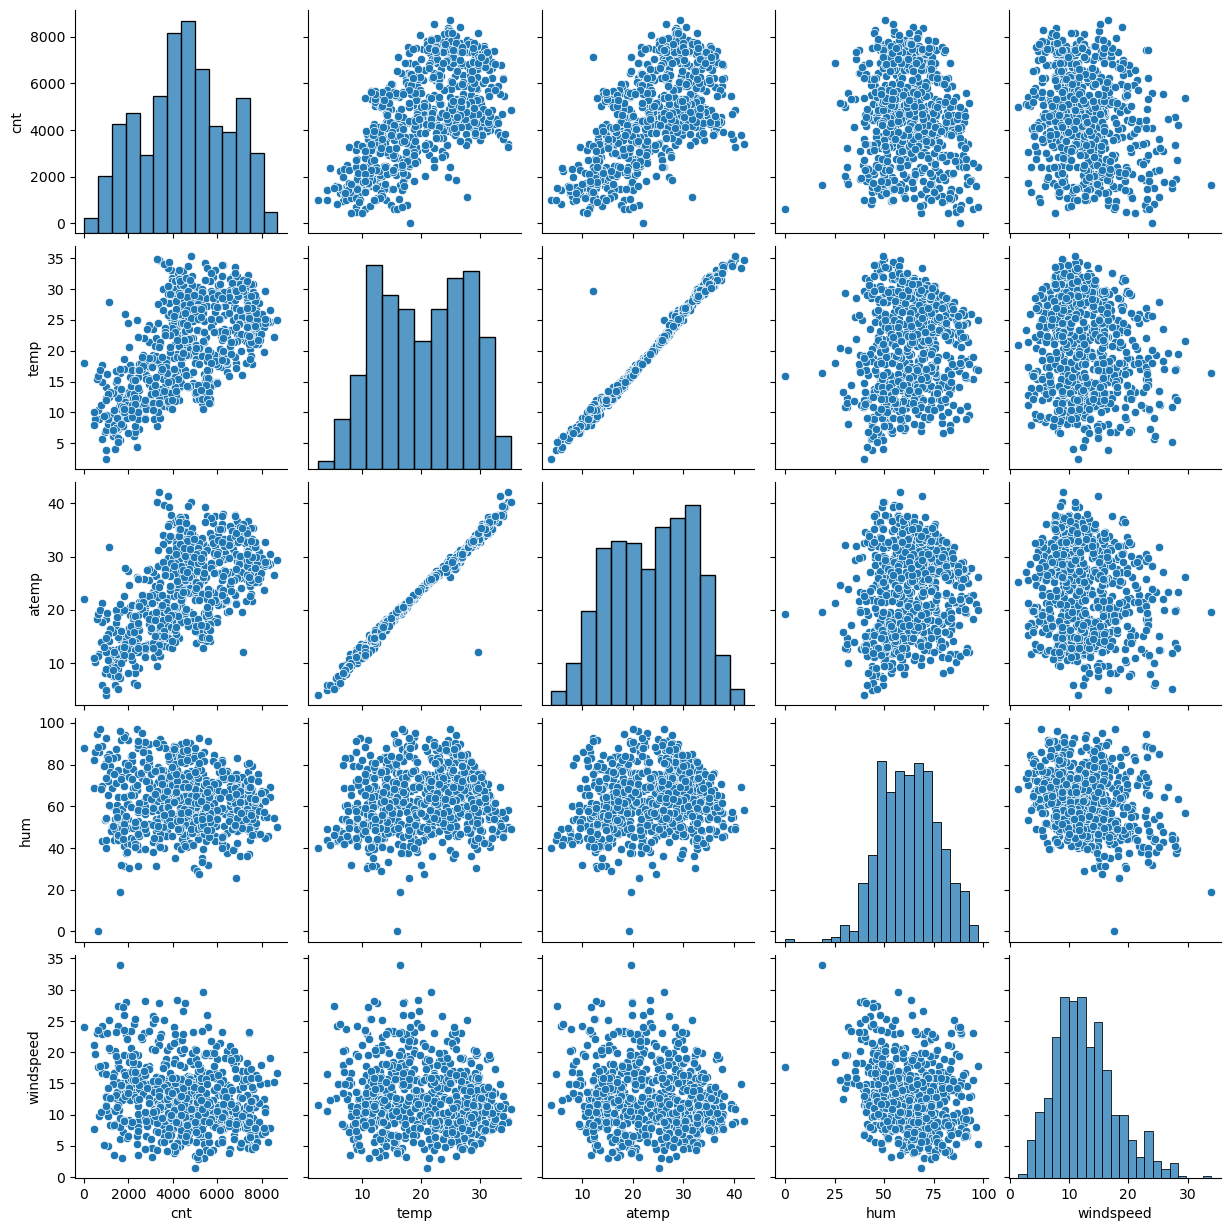

In [8]:
import seaborn as sns
df5 = pd.read_csv("day5.csv")
sns.pairplot(data=df5,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

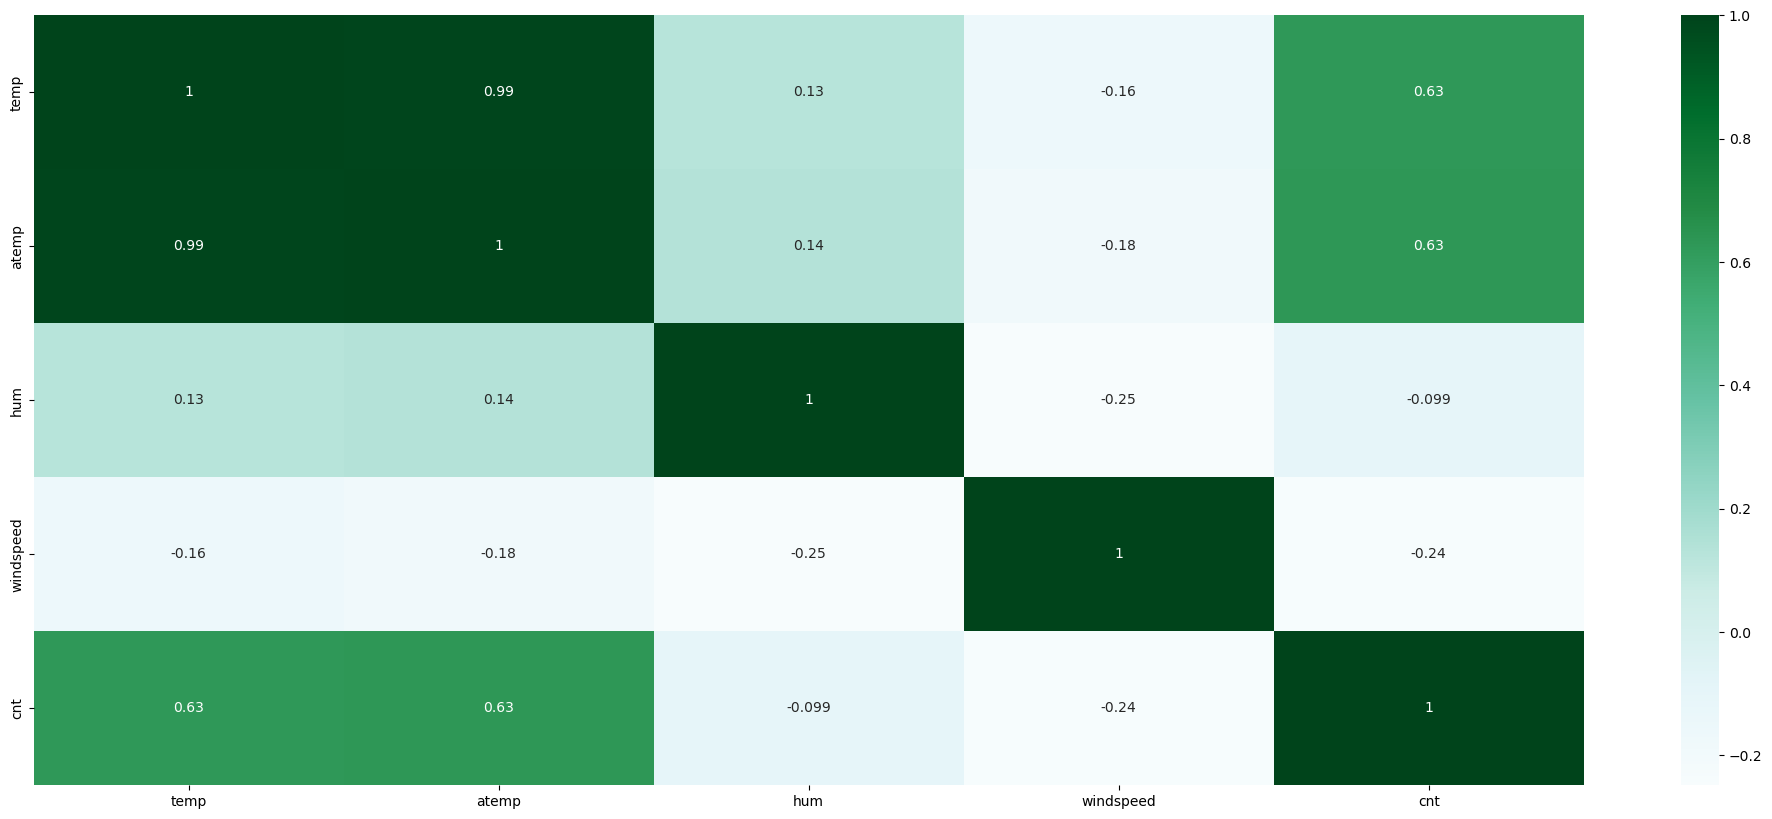

In [9]:
plt.figure(figsize=(25,10))
sns.heatmap(df5[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

In [10]:
#Lets start working on making the linear regression model now 
import pandas as pd
import matplotlib.pyplot as plt

df5 = pd.read_csv("day5.csv")

#Create test and train data 
from sklearn.model_selection import train_test_split
import numpy as np

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df5_train, df5_test = train_test_split(df5, train_size = 0.7, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df5_train[num_vars] = scaler.fit_transform(df5_train[num_vars])

print(df5_train.shape)
print(df5_test.shape)

(510, 30)
(219, 30)


In [11]:
#Dividing into X and Y sets for the model building

y_train = df5_train.pop('cnt')
X_train = df5_train

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
print(col)


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Month_8',
       'Month_9', 'Month_10', 'Season_2', 'Season_3', 'Season_4', 'Weekday_6',
       'Weather_2', 'Weather_3'],
      dtype='object')


In [12]:
X_train.columns[~rfe.support_]
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          1.89e-191
Time:                        16:12:56   Log-Likelihood:                -4105.7
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     494   BIC:                             8311.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1716.9790    249.590      6.879      0.0

In [13]:
#Drop Season_3 as p is greater than 0.05
X_train_new = X_train_rfe.drop(["Season_3"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
#X values of X training dataset is X_train_lm
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          3.24e-192
Time:                        16:12:56   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     495   BIC:                             8307.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1712.9452    249.777      6.858      0.0

In [14]:
#Drop Const before calculating vif
X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
10,Season_4,2.27
12,Weather_2,2.14
0,yr,2.03
11,Weekday_6,1.90
9,Season_2,1.83
8,Month_10,1.62


In [15]:
#Drop hum as VIF is greater than 5
X_train_new = X_train_new.drop(["hum"], axis = 1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
9,Season_4,2.02
8,Season_2,1.82
10,Weekday_6,1.77
7,Month_10,1.62
5,Month_8,1.59
11,Weather_2,1.54


In [16]:
# Build the model again
# Adding a constant variable  
#X values of X training dataset is X_train_lm
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          6.16e-189
Time:                        16:12:56   Log-Likelihood:                -4117.2
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        843.6762    165.629      5.094      0.0

Text(0.5, 0, 'Errors')

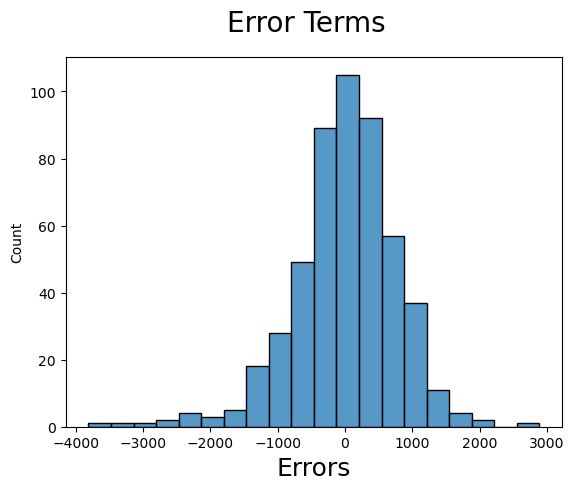

In [17]:
#Residual Analysis of the train data
#So, now to check if the error terms are also normally distributed 
#(which is infact, one of the major assumptions of linear regression), 
#let us plot the histogram of the error terms and see what it looks like.
y_train_cnt = lm.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [18]:
#Making Predictions
#Applying the scaling on the test sets
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
df5_test_lm=df5_test
df5_test_lm[num_vars] = scaler.transform(df5_test_lm[num_vars])
y_test = df5_test_lm.pop('cnt')
X_test = df5_test_lm
#Now let's use our model to make predictions.



In [19]:
# Creating X_test_new dataframe by dropping variables from X_test
print(X_train_new.columns)
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions
y_pred = lm.predict(X_test_new)

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Month_8',
       'Month_9', 'Month_10', 'Season_2', 'Season_4', 'Weekday_6', 'Weather_2',
       'Weather_3'],
      dtype='object')


Text(0, 0.5, 'y_pred')

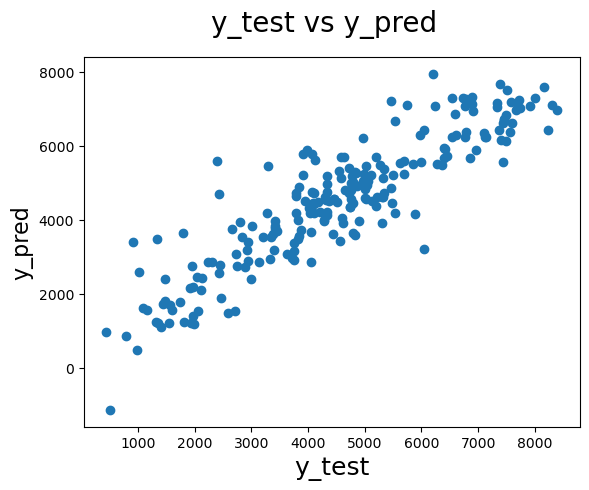

In [20]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8026410728126752